# K-Means

In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Synthetic Dataset for K-Means Clustering')

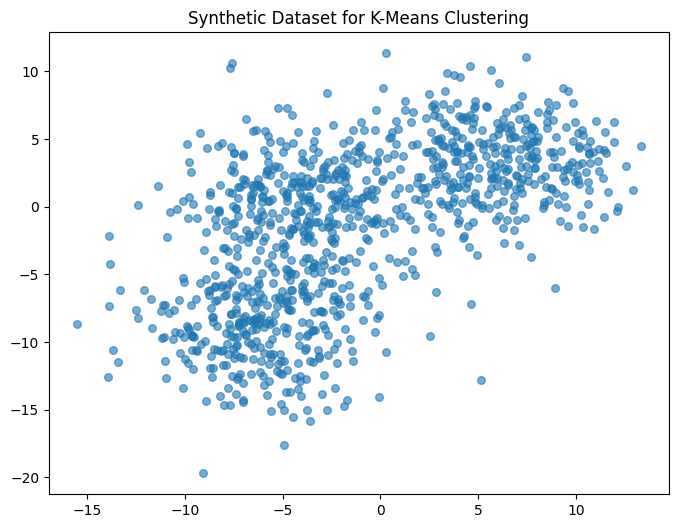

In [31]:
data = make_blobs(n_samples=1000, centers=3, cluster_std=3, random_state=17)
X, _ = data

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.title("Synthetic Dataset for K-Means Clustering")

## 1. K-Means from scratch

### Step 1: Initialize random centroids

### Step 2: Compute distance matrix

### Step 3: Assign to clusters

### Step 4: Update centroids

### Step 5: Repeat n_iterations

In [32]:
import numpy as np

In [33]:
class MyKMeans:
    def __init__(self, k=3, n_iterations=100):
        self.k = k
        self.n_iterations = n_iterations
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.n_iterations):
            #  2 , 3
            distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
            self.labels = np.argmin(distances, axis=1)

            #  4
            new_centroids = np.array(
                [
                    (
                        X[self.labels == i].mean(axis=0)
                        if len(X[self.labels == i]) > 0
                        else self.centroids[i]
                    )
                    for i in range(self.k)
                ]
            )

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

In [34]:
import matplotlib.pyplot as plt

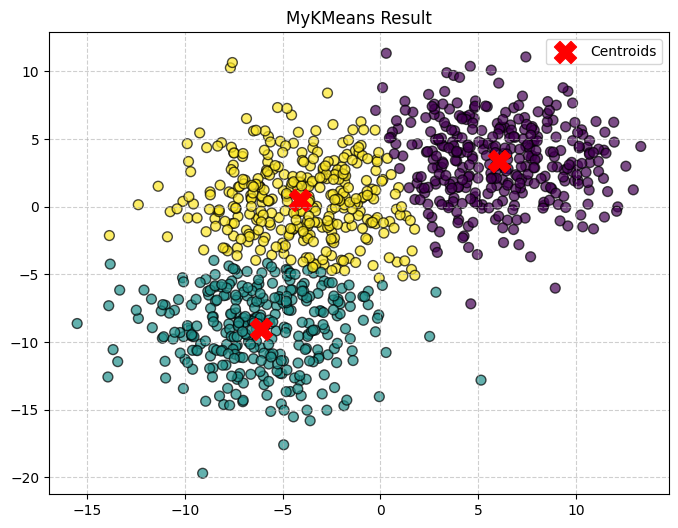

In [35]:
km = MyKMeans(k=3, n_iterations=100)
km.fit(X)
my_labels = km.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap="viridis", s=50, alpha=0.7, edgecolors="k")
plt.scatter(
    km.centroids[:, 0],
    km.centroids[:, 1],
    c="red",
    marker="X",
    s=250,
    label="Centroids",
)
plt.title("MyKMeans Result")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## 2. K-Means from sklearn

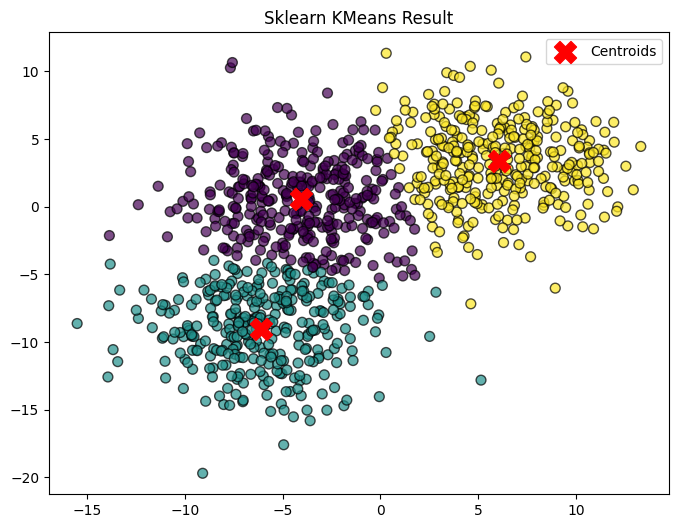

In [36]:
from sklearn.cluster import KMeans


# Инициализируем и обучаем
# n_init='auto' или число нужно для подавления предупреждений в новых версиях
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Получаем метки и центроиды
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Отрисовка
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7, edgecolors="k")
plt.scatter(
    centroids[:, 0], centroids[:, 1], c="red", marker="X", s=250, label="Centroids"
)
plt.title("Sklearn KMeans Result")
plt.legend()
plt.show()

In [37]:
print("My centroids")
print(km.centroids)

print("sklearn centroids:")
print(kmeans.cluster_centers_)

dist_centroids = np.linalg.norm(
    np.sort(km.centroids, axis=0) - np.sort(kmeans.cluster_centers_, axis=0)
)
print(f"Difference: {dist_centroids:.4f}")

My centroids
[[ 6.04708249  3.3671181 ]
 [-6.12976298 -9.0439517 ]
 [-4.094826    0.51947961]]
sklearn centroids:
[[-4.08810725  0.5326767 ]
 [-6.13054005 -9.0281373 ]
 [ 6.04708249  3.3671181 ]]
Difference: 0.0217


## 3. Which K is best?

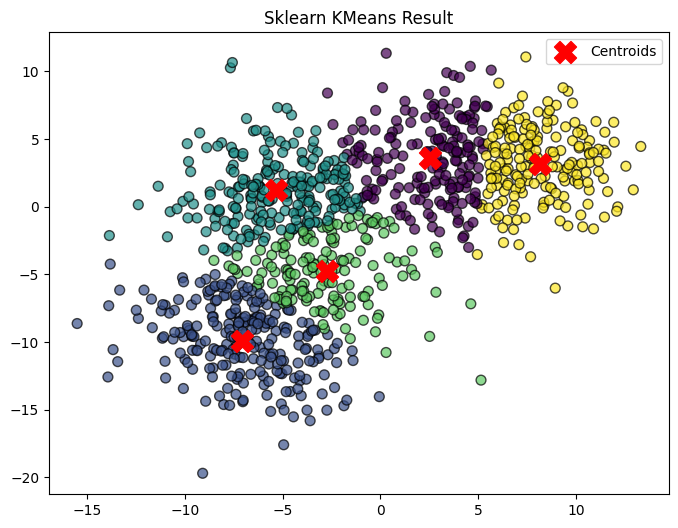

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)

# Получаем метки и центроиды
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Отрисовка
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7, edgecolors="k")
plt.scatter(
    centroids[:, 0], centroids[:, 1], c="red", marker="X", s=250, label="Centroids"
)
plt.title("Sklearn KMeans Result")
plt.legend()
plt.show()

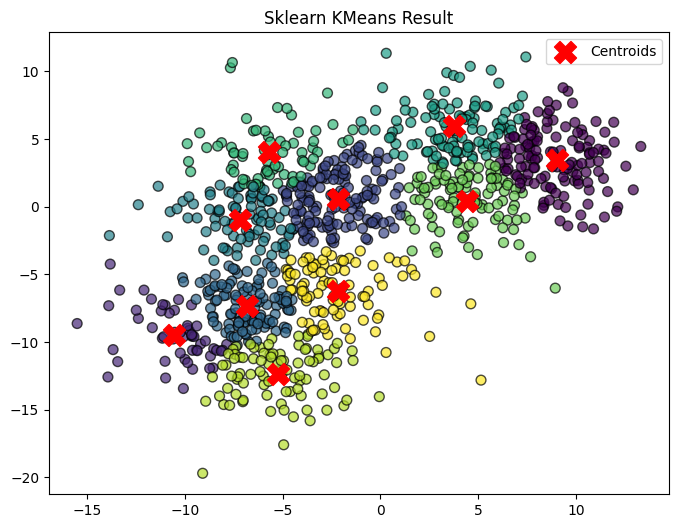

In [39]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X)

# Получаем метки и центроиды
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Отрисовка
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7, edgecolors="k")
plt.scatter(
    centroids[:, 0], centroids[:, 1], c="red", marker="X", s=250, label="Centroids"
)
plt.title("Sklearn KMeans Result")
plt.legend()
plt.show()

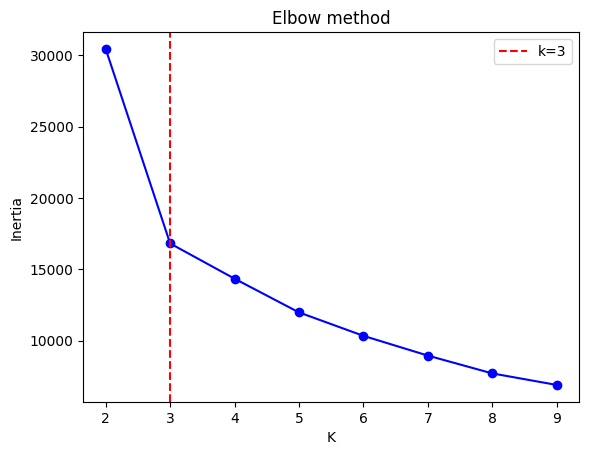

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 10)
inertia = []
silhouettes = []

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertia.append(model.inertia_)
    silhouettes.append(silhouette_score(X, model.labels_))


# График локтя
plt.plot(K, inertia, "bo-")
plt.axvline(x=3, color="red", linestyle="--", label="k=3")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.legend()


plt.show()